In [ ]:
"""
In this notebook, I query the MySQL database resulting from the actions of 
import_game_pbp_data.py and create histograms to visualize the data and 
confirm that it looks similar to how I expect. In particular, I expect there
to be more passes on plays: on later downs, with more yards to go to get a first
down, starting near either goalline, and with negative values of
(score differential)/(time remaining). The histograms that result from the 
following cells confirm these expectations, which were assumed when creating
the logistic regression model employed in NFL_Off_Plays_Logit.ipynb. By 
default, these cells get data from the Baltimore Ravens' season, but querying
other team's tables in the database give similar results.
"""

In [1]:
import getpass
import MySQLdb as mdb
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
rootpass = getpass.getpass("Enter the MySQL root password: ")
con = mdb.connect('localhost', 'root', rootpass, 'NFL_Offensive_Plays_2015')
cur = con.cursor()

Enter the MySQL root password: ········


In [3]:
cur.execute("SELECT Down FROM `Baltimore Ravens` WHERE IsPass = 0")
downRunTemp = cur.fetchall()
downRun = []
for down in downRunTemp:
    downRun.append(down[0])
cur.execute("SELECT Down FROM `Baltimore Ravens` WHERE IsPass = 1")
downPassTemp = cur.fetchall()
downPass = []
for down in downPassTemp:
    downPass.append(down[0])

The below plot confirms that teams are more likely to run on later downs--especially on third down. I imagine that many fourth downs are short-yardage situations, which is why it seems that the probability of a run is greater than on third down.

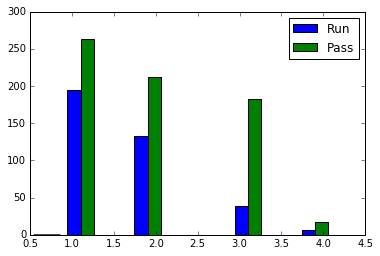

In [4]:
downHist = pl.hist([downRun,downPass], range=(.5,4.5))
legend = pl.legend(['Run','Pass'])
pl.show(downHist)

In [22]:
cur.execute("SELECT `To Go` FROM `Baltimore Ravens` WHERE IsPass = 0 AND NOT Down = 1")
toGoRunTemp = cur.fetchall()
toGoRun = []
for num in toGoRunTemp:
    toGoRun.append(num[0])
cur.execute("SELECT `To Go` FROM `Baltimore Ravens` WHERE IsPass = 1 AND NOT Down = 1")
toGoPassTemp = cur.fetchall()
toGoPass = []
for num in toGoPassTemp:
    toGoPass.append(num[0])

The below plot confirms that when there are fewer yards to go to get a first down, teams are more likely to run.

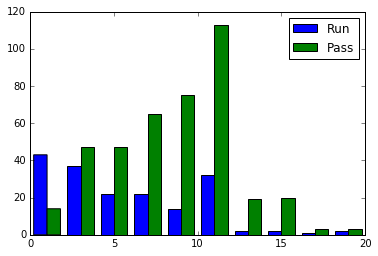

In [23]:
toGoHist = pl.hist([toGoRun,toGoPass],range=(0,20))
pl.legend(['Run','Pass'])
pl.show()

In [24]:
cur.execute("SELECT `Field Position` FROM `Baltimore Ravens` WHERE IsPass = 0")
fieldPosRunTemp = cur.fetchall()
fieldPosRun = []
for fieldPos in fieldPosRunTemp:
    fieldPosRun.append(fieldPos[0])
cur.execute("SELECT `Field Position` FROM `Baltimore Ravens` WHERE IsPass = 1")
fieldPosPassTemp = cur.fetchall()
fieldPosPass = []
for fieldPos in fieldPosPassTemp:
    fieldPosPass.append(fieldPos[0])

The below plot confirms that teams are more likely to run near either goal line than they are in other situations. 

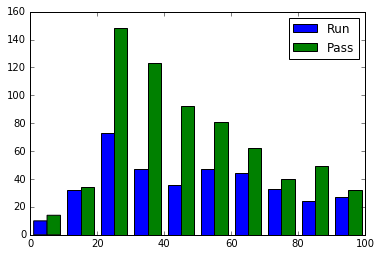

In [25]:
fieldPosHist = pl.hist([fieldPosRun,fieldPosPass],range=(0,100))
pl.legend(['Run','Pass'])
pl.show()

In [26]:
cur.execute("SELECT `Score Differential`, `Time Remaining` FROM `Baltimore Ravens` WHERE IsPass = 0")
scoreDiffRunTemp = cur.fetchall()
scoreDiffRun = []
for row in scoreDiffRunTemp:
    scoreDiffRun.append(float(row[0])/float(row[1]))
cur.execute("SELECT `Score Differential`, `Time Remaining` FROM `Baltimore Ravens` WHERE IsPass = 1")
scoreDiffPassTemp = cur.fetchall()
scoreDiffPass = []
for row in scoreDiffPassTemp:
    scoreDiffPass.append(float(row[0])/float(row[1]))

The below plot confirms that teams are more likely to pass when they are behind late in the game (i.e. (score differential)/(time remaining) is less than -.05), and run if they are ahead late in the game (i.e. (score differential)/(time remaining) is greater than .05).

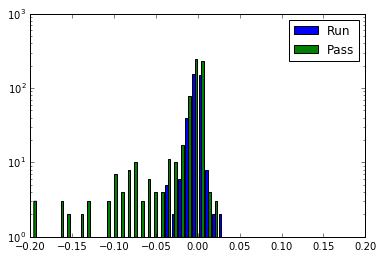

In [27]:
scoreDiffHist = pl.hist([scoreDiffRun,scoreDiffPass],bins=50,log=True, range=(-.2,.2))
pl.legend(['Run','Pass'])
pl.show()